***

<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

***

# **NLP With Hotel Review Part 2**

By: Robby Khoutsaysana

***

### **Introduction**

In this deliverable, we will develop several machine learning models to correctly label the sentiment behind hotel reviews.

Our target column is the `"rating"` column, which is a binary column denoting good ratings as 1 and bad ones as 0.

### **About the Data**

We have been provided with a cleaned and preprocessed dataset, which differs from `NLP With Hotel Review Part 1`. 

[Download the data here](https://api.brainstation.io/content/link/16DkHhup_0nI5LgZzYsdfsfwN60DKaiAN).

This dataset is a subset of the Hotel Reviews dataset from Kaggle. More information on the original dataset can be found [here](https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe).

***

To begin, we will import the necessary libraries and load the data.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, we will read in the cleaned and preprocessed dataset we will be using for this project. 

In [2]:
# importing dataset
test_set = pd.read_csv('clean_test_dataframe.csv')
train_set = pd.read_csv('clean_train_dataframe.csv')

# printing the shape of the dataset
print('Shape of the trainset: ', train_set.shape)
print('Shape of the testset: ', test_set.shape)

Shape of the trainset:  (12798, 2744)
Shape of the testset:  (4267, 2744)


It looks like our data is already split for us. In this case, we can just assign the train and test data to their respective variables.

In [3]:
# splitting the dataset into independent and dependent variables using the rating column as the dependent variable
X_train = train_set.drop(columns=['rating'])
y_train = train_set['rating']
X_test = test_set.drop(columns=['rating'])
y_test = test_set['rating']

# printing the shape of the independent and dependent variables
print('Shape of the independent variables in the trainset: ', X_train.shape)
print('Shape of the dependent variables in the trainset: ', y_train.shape)
print('Shape of the independent variables in the testset: ', X_test.shape)
print('Shape of the dependent variables in the testset: ', y_test.shape)

Shape of the independent variables in the trainset:  (12798, 2743)
Shape of the dependent variables in the trainset:  (12798,)
Shape of the independent variables in the testset:  (4267, 2743)
Shape of the dependent variables in the testset:  (4267,)


Let's check if the proportions of the target column are split close to 50/50. This is important because if the proportions are not split close to 50/50, this could cause our model to be biased towards the majority class.

In [4]:
# Check the class proportions again
print('Train set class proportions:')
print(y_train.value_counts(normalize=True), '\n')
print('Test set class proportions:')
print(y_test.value_counts(normalize=True))

Train set class proportions:
1    0.576106
0    0.423894
Name: rating, dtype: float64 

Test set class proportions:
1    0.576049
0    0.423951
Name: rating, dtype: float64


Great! We now have our X and y for both the train and test data. 

Since we have been provided with a cleaned and preprocessed dataset, we can jump right into the modeling process.

---

## **Modeling**

### **Logistic Regression**

For this model, we will use the `lbfgs` solver and score it. We will also use the `multinomial` option for the `multi_class` parameter, and set the `max_iter` parameter to 1000. This will attempt to converge the model to a solution.

In [5]:
# importing the libraries for the model
from sklearn.linear_model import LogisticRegression

# instantiating the logistic regression model
log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

# fitting the model
log_reg.fit(X_train, y_train)
 
# predicting the test set results
y_pred = log_reg.predict(X_test)
 
# scoring the train and test set
print('Accuracy of the test set: ', log_reg.score(X_train, y_train))
print('Accuracy of the train set: ', log_reg.score(X_test, y_test))


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the test set:  0.7827004219409283
Accuracy of the train set:  0.76728380595266


It looks like we have a ConvergenceWarning, which means that the model did not converge. This is because the data is not linearly separable which is why we are getting this warning. To fix this, we will scale the data and try again.

In [6]:
# importing the libraries for Scaler
from sklearn.preprocessing import StandardScaler
 
# instantiating the scaler
scaler = StandardScaler()

# fitting the scaler
scaler.fit(X_train)
 
# transforming the train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# instantiating the logistic regression model
log_reg_scaled = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
 
# fitting the model
log_reg_scaled.fit(X_train_scaled, y_train)

# predicting the test set results
y_pred_scaled = log_reg_scaled.predict(X_test_scaled)
 
# scoring the train and test set
print('Accuracy of the scaled train set: ', log_reg_scaled.score(X_train_scaled, y_train))
print('Accuracy of the scaled test set: ', log_reg_scaled.score(X_test_scaled, y_test))

Accuracy of the scaled train set:  0.8856071261134553
Accuracy of the scaled test set:  0.7328333723927818


Great! We now have a model that has converged with a test score of 0.73.

---

#### **20 words most predictive of a good review & 20 words most predictive with a bad review**

The positive and negative review columns are already in the form of a bag of words, so we need to make sure we are capturing the words from the correct columns. Then we can use the `coef_` attribute of our logistic regression model to get the coefficients for each word. Then use the `sort_values()` method to sort the coefficients in descending order and get the top 20 words and bottom 20 words.

**NOTE: We will use both the scaled and unscaled data to show the difference in words.**

## **Un-Scaled Data**

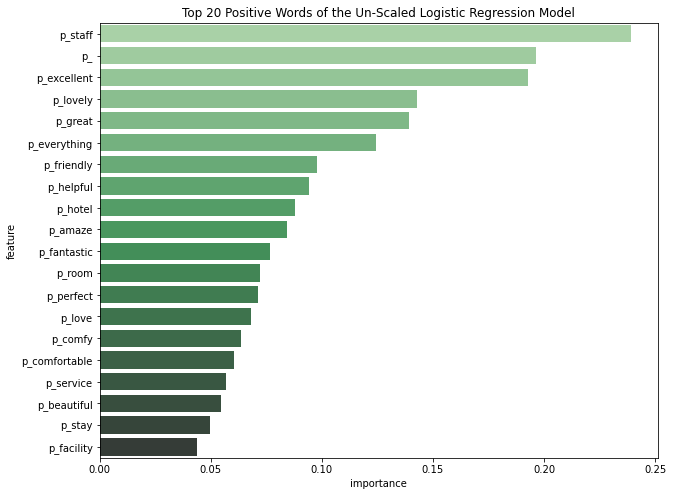

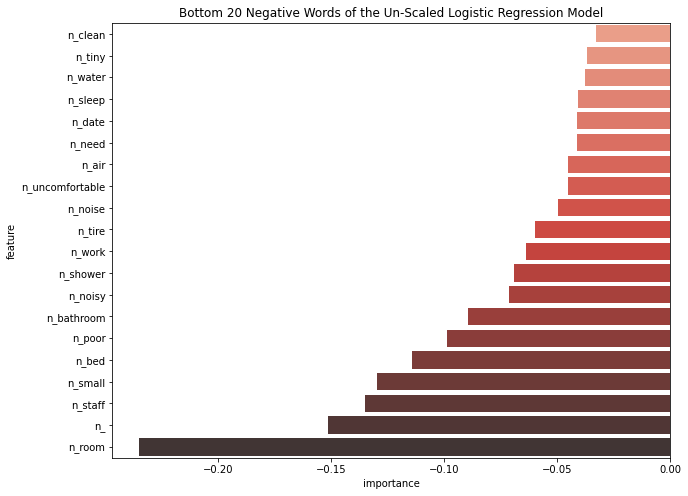

In [7]:
# using the coefficients of the logistic regression model
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': log_reg.coef_[0]})

# sorting the values in descending order
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

# splitting the features to positive and negative based on the first letter of the word
# positive features start with 'p' and negative features start with 'n'
positive_features = feature_importance[feature_importance['feature'].str.startswith('p')]
negative_features = feature_importance[feature_importance['feature'].str.startswith('n')]

# getting the top 20 positive features
top_20_positive_features = positive_features.head(20)

# getting the bottem 20 negative features
bottom_20_negative_features = negative_features.tail(20)

# plotting the top 20 positive words most predictive of a good review
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=top_20_positive_features, palette='Greens_d')
plt.title('Top 20 Positive Words of the Un-Scaled Logistic Regression Model')
plt.show()

# plotting the bottom 20 negative words most predictive of a bad review
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=bottom_20_negative_features, palette='Reds_d')
plt.title('Bottom 20 Negative Words of the Un-Scaled Logistic Regression Model')
plt.show()


## **Scaled Data**

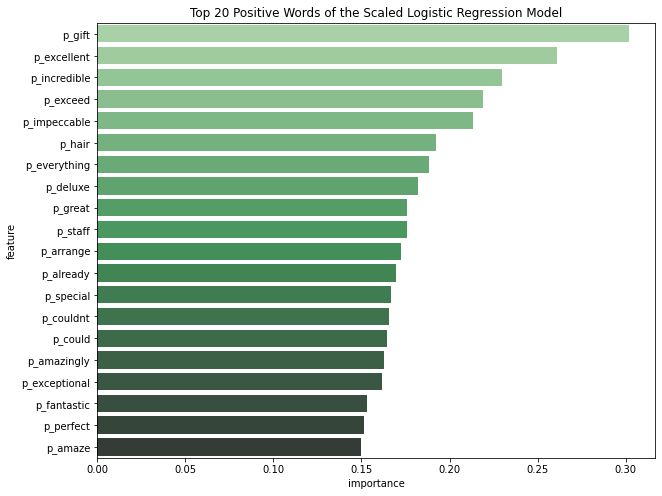

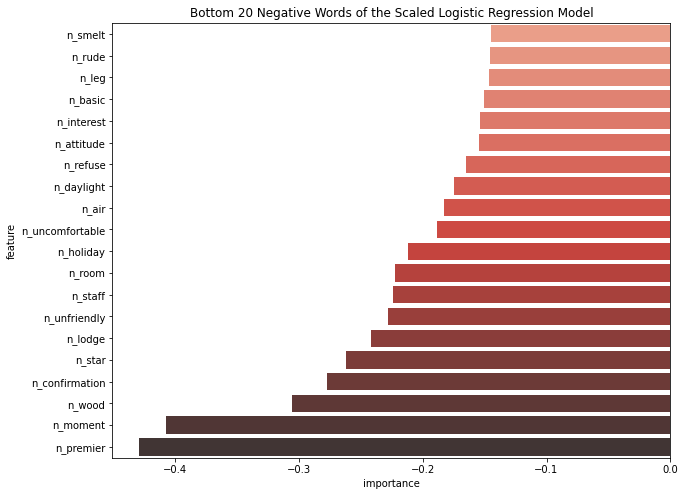

In [8]:
# using the coefficients of the logistic regression model
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': log_reg_scaled.coef_[0]})

# sorting the values in descending order
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

# splitting the features to positive and negative based on the first letter of the word
# positive features start with 'p' and negative features start with 'n'
positive_features = feature_importance[feature_importance['feature'].str.startswith('p')]
negative_features = feature_importance[feature_importance['feature'].str.startswith('n')]

# getting the top 20 positive features
top_20_positive_features = positive_features.head(20)

# getting the bottem 20 negative features
bottom_20_negative_features = negative_features.tail(20)

# plotting the top 20 positive words most predictive of a good review
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=top_20_positive_features, palette='Greens_d')
plt.title('Top 20 Positive Words of the Scaled Logistic Regression Model')
plt.show()

# plotting the bottom 20 negative words most predictive of a bad review
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=bottom_20_negative_features, palette='Reds_d')
plt.title('Bottom 20 Negative Words of the Scaled Logistic Regression Model')
plt.show()

Notice that when getting the top 20 words for positive and negative reviews, the words are different. This is because scaling the data changes the coefficients. This is important to note when using logistic regression models with scaled data because the words that are most predictive of a good or bad review will be different, and it would be hard to interpret the model if we only use the scaled data.

---

## **PCA**

Lets use the `PCA` class from `sklearn.decomposition` to reduce the dimensionality of our data. We will use the `n_components` parameter to set the number of components to 90% of the variance in our data.

In [9]:
# importing the libraries for the PCA
from sklearn.decomposition import PCA

# Lets say we want to keep 90% of the variance
my_PCA = PCA(n_components = 0.9)
my_PCA.fit(X_train_scaled)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

# comparing the shape of the train of the original, to the train of the PCA
print('Shape of the original train set: ', X_train_scaled.shape)
print('Shape of the PCA transformed train set: ', X_train_PCA.shape)

Shape of the original train set:  (12798, 2743)
Shape of the PCA transformed train set:  (12798, 1891)


We have successfully reduced the dimensionality of our data to 90% of the variance. 

Now lets use the `timeit` function to time how long it takes to fit a logistic regression model to our data.

In [10]:
# importing time to check the time it takes to run the model
import timeit

# comparing the runtime of the original model to the PCA model
start = timeit.default_timer()
log_reg.fit(X_train_scaled, y_train)
stop = timeit.default_timer()
print('The runtime of the original model is: ', stop - start)
 
start = timeit.default_timer()
log_reg.fit(X_train_PCA, y_train)
stop = timeit.default_timer()
print('The runtime of the PCA model is: ', stop - start)


The runtime of the original model is:  15.627157000009902
The runtime of the PCA model is:  9.814911299967207


Looking at the results, we can see that the run-time significantly decreases after reducing the dimensionality of our data. This means that the relationship between the number of dimensions and the time it takes to fit a logistic regression model is linear.

---

#### **Advantage vs Disadvantage of Dimensionality Reduction**

The `advantage` of dimensionality reduction is that it can reduce the computational time of our model. This is because we are reducing the number of features in our data, while still maintaining a high accuracy score. We can also reduce the amount of memory needed to store our data.

The `disadvantage` of dimensionality reduction is that we are losing information about our data. This can be a problem if we are trying to explain the variance in our data, or if we are trying to use our model to make predictions on new data.

---

#### **K-Nearest Neighbour classifier**

In this section, we will scale our data and fit it to a KNN model. Scaling the data is important because KNN is a distance based model, and the features in our data are on different scales. This means that the distance between the observations will be different for each feature. Scaling will also ensure that the distance between the observations is the same for each feature.

In [11]:
# scaling the data
scaler = StandardScaler()
 
# fitting the scaler to the train set
scaler.fit(X_train)
 
# transforming the train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# importing the libraries for KNN
from sklearn.neighbors import KNeighborsClassifier

# let run a KNN model with the scaled data
# instantiating the KNN model
knn_scaled = KNeighborsClassifier()
 
# fitting the model to the scaled train set
knn_scaled.fit(X_train_scaled, y_train)
 
# predicting the target variable for the scaled test set
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)
 
# training and test score
print('KNN Training score: ', knn_scaled.score(X_train_scaled, y_train))
print('KNN Test score: ', knn_scaled.score(X_test_scaled, y_test))

KNN Training score:  0.751211126738553
KNN Test score:  0.6367471291305367


We now have our baseline KNN model.

---

#### **KNN is a computationally expensive model.**

Lets get a visual representation of the relationship between the number of observations and run-time for KNN. We will do this by using the `timeit` module to time our KNN model with different numbers of observations. We will then plot the results to see the relationship between the number of observations and run-time for KNN.

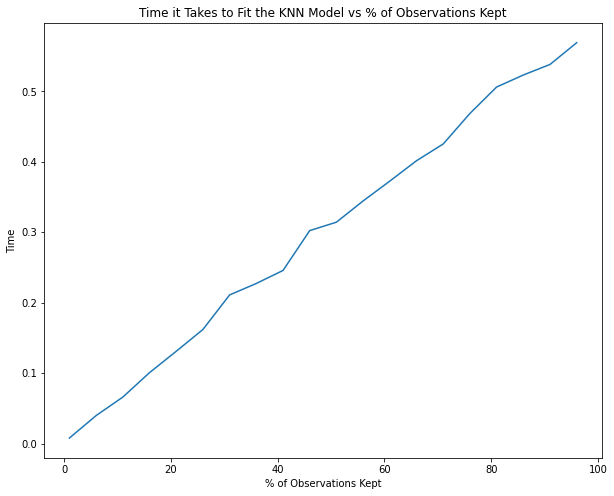

In [13]:
# importing timeit
import timeit

# getting a visual of the % reduced observations vs the time it takes to fit the KNN model
time = []
percent = []

for i in range(1, 100, 5):
    # getting the number of observations to keep
    n = int(len(X_train_scaled) * (i/100))
    
    # getting the time it takes to fit the model
    t = timeit.timeit(lambda: KNeighborsClassifier().fit(X_train_scaled[:n], y_train[:n]), number=1)
    
    # appending the time and the percent to the list
    time.append(t)
    percent.append(i)
     
# plotting the % of the observations vs the time it takes to fit the KNN model
plt.figure(figsize=(10, 8))
plt.plot(percent, time)
plt.title('Time it Takes to Fit the KNN Model vs % of Observations Kept')
plt.ylabel('Time')
plt.xlabel('% of Observations Kept')
plt.show()

The relationship between the number of observations and run-time for KNN is linear. This is because the run-time for KNN is directly proportional to the number of observations in our data. KNN is a distance based model, and the more observations we have, the more distance calculations we will have to make.

---

#### **Advantage vs Disadvantage of reducing the number of observations.**

One `advantage` of reducing the number of observations is that it can reduce the computational time of our model. This is because we are reducing the number of observations in our dataset, which means that our model will take less time to train and test. 

The `disadvantage` of reducing the number of observations is that we are losing information about our data. This can be a problem if we are trying to explain the variance in our data, or if we are trying to use our model to make predictions on new data.

---

#### **Optimal Value for K**

In this section, we will use the dataset to find an optimal value for K in the KNN algorithm. We will do this by splitting our data into train and validation sets and scale the data. Then we will fit our KNN model with different values of K. The value of K that gives us the highest accuracy score on our validation set will be our optimal value for K.

In [14]:
# import train_test_split
from sklearn.model_selection import train_test_split

# splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

# scaling the data
scaler = StandardScaler()
 
# fitting the scaler to the train set
scaler.fit(X_train)
 
# transforming the train and validation set
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

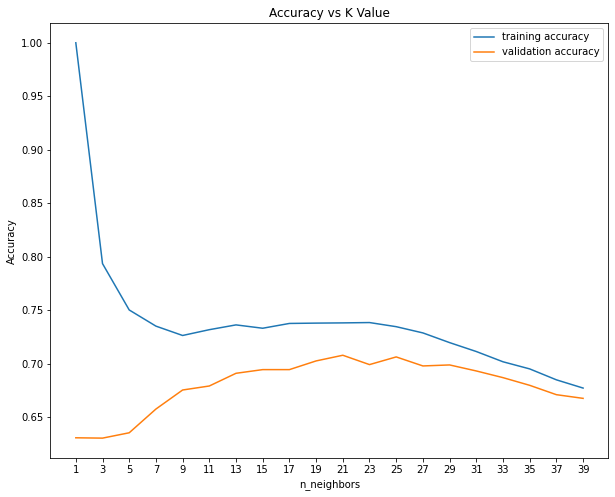

In [15]:
# using the split set to find the optimal value for K in the KNN algorithm
training_accuracy = []
validation_accuracy = []

# list of K values to try
neighbors_settings = range(1, 41, 2)

# looping through the K values on scaled data
for n_neighbors in neighbors_settings:
    # building the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    
    # recording the training set accuracy
    training_accuracy.append(knn.score(X_train_scaled, y_train))
    
    # recording the generalization accuracy
    validation_accuracy.append(knn.score(X_val_scaled, y_val))
 
# plotting the training and validation accuracy
plt.figure(figsize=(10, 8))
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, validation_accuracy, label='validation accuracy')
plt.title('Accuracy vs K Value')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.xticks(neighbors_settings)
plt.legend()
plt.show()

Looking at the results, we can see that the higher the value of K, the more prone our model is to overfitting. Lets look for the value of K that gives us the best accuracy score on our validation set.

In [16]:
# the optimal value for K
optimal_k = neighbors_settings[validation_accuracy.index(max(validation_accuracy))]
print('The optimal value for K is: ', optimal_k)

The optimal value for K is:  21


Now that we have our optimal value for K, we can fit our KNN model to our data and see how it performs on our test set.

In [17]:
# instantiating the KNN model with the optimal value for K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
 
# fitting the model to the train set
knn.fit(X_train, y_train)
 
# predicting the target variable for the scaled test set
y_pred_knn = knn.predict(X_test)
 
# training and test score
print('KNN Training score with the optimal value is: ', knn.score(X_train, y_train))
print('KNN Test score with the optimal value is: ', knn.score(X_test, y_test))

KNN Training score with the optimal value is:  0.6687851635757449
KNN Test score with the optimal value is:  0.6449496133114601


Great! We now have our optimal KNN model.

---

The issue with splitting the data into train and validation sets after performing vectorization is that we are introducing bias into our model. This is because we are using information from the validation set to vectorize our data. This means that our model will have an unfair advantage when we test it on the validation set. This is why we should always split our data into train and validation sets before performing vectorization. 

---

### **Decision Tree classifier**

Lets fit a Decision Tree model to our data. We will use the `DecisionTreeClassifier` class from `sklearn.tree` to fit our model.

In [18]:
# importing the libraries for the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiating the Decision Tree model
tree = DecisionTreeClassifier()

# fitting the model to the scaled train set
tree.fit(X_train, y_train)
 
# predicting the target variable for the scaled test set
y_pred = tree.predict(X_test)
 
# training and test score
print('Training score of the Decision Tree model: ', tree.score(X_train, y_train))
print('Test score of the Decision Tree model: ', tree.score(X_test, y_test))

Training score of the Decision Tree model:  1.0
Test score of the Decision Tree model:  0.6960393719240684


We now have our baseline Decision Tree model. Notice that the accuracy score on our test set is lower than the accuracy score on our train set. This is because our model is overfitting to our train set. This is because the Decision Tree model is prone to overfitting.

---

#### **Finding an optimal value for the maximum depth of the decision tree.**

In this section, we will use the dataset to find an optimal value for the maximum depth of the decision tree. We will do this by splitting our data into train and validation sets, and then using a for loop to fit our Decision Tree model with different values of the maximum depth. We will then plot the results to see which value of the maximum depth gives us the best accuracy score.

In [19]:
# importing train_test_split
from sklearn.model_selection import train_test_split

# splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

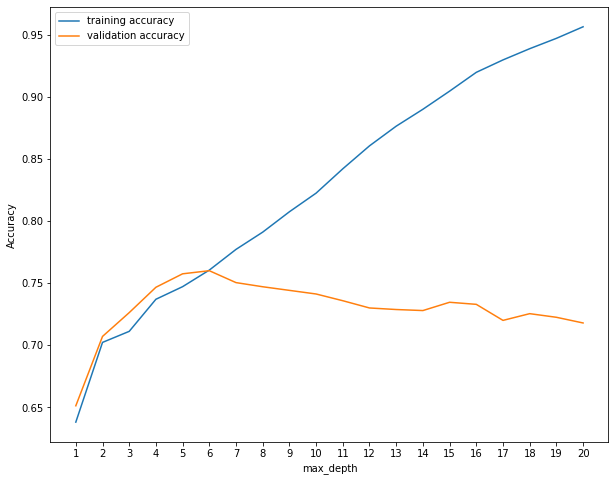

In [20]:
# using the split set to find the optimal value for max_depth in the Decision Tree algorithm
training_accuracy = []
validation_accuracy = []
 
# list of max_depth values to try
max_depth_settings = range(1, 21)
 
# looping through the max_depth values on scaled data
for max_depth in max_depth_settings:
    # building the model
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    
    # recording the training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    validation_accuracy.append(tree.score(X_val, y_val))
    
# plotting the training and validation accuracy
plt.figure(figsize=(10, 8))
plt.plot(max_depth_settings, training_accuracy, label='training accuracy')
plt.plot(max_depth_settings, validation_accuracy, label='validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.xticks(max_depth_settings)
plt.legend()
plt.show()

We can see a similar pattern to the KNN model. The higher the value of the maximum depth, the more prone our model is to overfitting. Lets look for the value of the maximum depth that gives us the best accuracy score on our validation set.

In [21]:
# the optimal value for max_depth
optimal_depth = max_depth_settings[validation_accuracy.index(max(validation_accuracy))]
print('The optimal value for max_depth is: ', optimal_depth)

The optimal value for max_depth is:  6


Next, we will fit our Decision Tree model to our data and see how it performs on our test set.

In [22]:
# instantiating the Decision Tree model with the optimal value for max_depth
tree = DecisionTreeClassifier(max_depth=optimal_depth)
 
# fitting the model to the train set
tree.fit(X_train, y_train)
 
# predicting the target variable for the scaled test set
y_pred_tree = tree.predict(X_test)

# training and test score
print('DT Training score with optimal value is: ', tree.score(X_train, y_train))
print('DT Test score with optimal value is: ', tree.score(X_test, y_test))

DT Training score with optimal value is:  0.7604890247290914
DT Test score with optimal value is:  0.7372861495195688


Great! We now have our optimal Decision Tree model. It looks like our optimal Decision Tree model is performing better than our optimal KNN model.

---

#### **Advantages of Decision Trees over KNN.**

The `advantages` of decision trees over KNN are that they are more accurate than KNN, and they are easier to interpret. This is because decision trees are a non-parametric model, which means that they do not make any assumptions about the data. They can fit the data better than KNN, which is a distance based model. Decision trees are also easier to interpret because they are a visual model. This means that we can see the rules that our model is using to make predictions.

The `weaknesses` of decision trees are that they are prone to overfitting, and they are not as accurate as KNN. This means that they are not as good at making predictions on new data.

---

#### **What is the purpose of the validation set?**

The purpose of the validation set is to test our model on data that it has not seen before. This is different than the test set because the test set is used to test our model on data that it has seen before. This means that the test set is not a good representation of how our model will perform on new data. This is why we should always use a validation set to test our model on data that it has not seen before.

---

#### **Performing a 5-fold cross validation to optimize the hyperparameters of your model.**

In this section, we will perform a 5-fold cross validation to optimize the hyperparameters of our Decision Tree model. We will do this by plotting the results of our cross validation to see which value of the maximum depth gives us the best accuracy score.

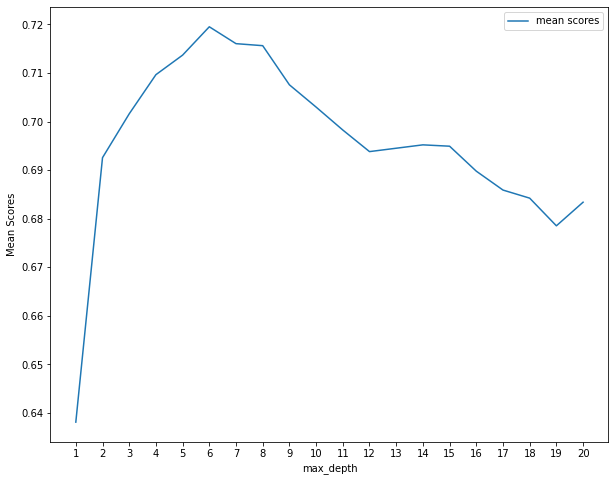

The optimal value for max_depth is:  6


In [23]:
# importing libraries for cross validation
from sklearn.model_selection import cross_val_score

# plotting the 5-fold cross validation scores for the Decision Tree model
max_depth_settings = range(1, 21)
mean_scores = []
 
# looping through the max_depth values on scaled data
for max_depth in max_depth_settings:
    # instantiating the Decision Tree model
    tree = DecisionTreeClassifier(max_depth=max_depth)
    
    # fitting the model to 5 folds of the train set
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    
    # appending the mean score to the list
    mean_scores.append(scores.mean())
     
# plotting the mean scores
plt.figure(figsize=(10, 8))
plt.plot(max_depth_settings, mean_scores, label='mean scores')
plt.ylabel('Mean Scores')
plt.xlabel('max_depth')
plt.xticks(max_depth_settings)
plt.legend()
plt.show()

# printing the optimal value for max_depth
cv_optimal_depth = max_depth_settings[mean_scores.index(max(mean_scores))]
print('The optimal value for max_depth is: ', cv_optimal_depth)

Great! Now that we have our optimal value for the maximum depth, we can fit our Decision Tree model to our data and see how it performs on our test set.

In [24]:
# instantiating the Decision Tree model with the optimal value for max_depth
tree = DecisionTreeClassifier(max_depth=cv_optimal_depth)

# fitting the model to the train set
tree.fit(X_train, y_train)

# predicting the target variable for the scaled test set
y_pred_tree = tree.predict(X_test)
 
# training and test score
print('Training score: ', tree.score(X_train, y_train))
print('Test score: ', tree.score(X_test, y_test))

Training score:  0.7604890247290914
Test score:  0.7368174361378017


We've now optimized our Decision Tree model using a 5-fold cross validation. It looks like our 5-fold Decision Tree model is performing better than our optimal Decision Tree model. This is because we are using more data to train our model, which means that our model is more likely to generalize well to new data.

---

#### **Confusion Matrix**

Lets begin by reviewing our test scores on our optimized models to see which model performed the best.

In [25]:
# printing the test scores for all our optimized models
print('KNN Test score with the optimal value is: ', knn.score(X_test, y_test))
print('DT Test score with optimal value is: ', tree.score(X_test, y_test))

KNN Test score with the optimal value is:  0.6449496133114601
DT Test score with optimal value is:  0.7368174361378017


It looks like our optimized Decision Tree model is performing the best on our test set. Lets look at the confusion matrix for our optimized Decision Tree model.

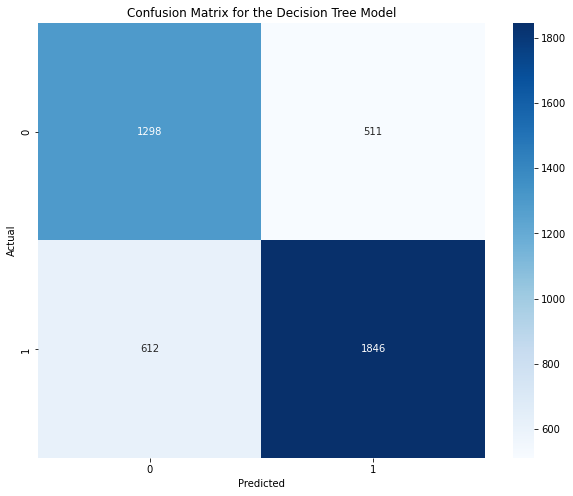

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1809
           1       0.78      0.75      0.77      2458

    accuracy                           0.74      4267
   macro avg       0.73      0.73      0.73      4267
weighted avg       0.74      0.74      0.74      4267



In [26]:
# importing the confusion matrix
from sklearn.metrics import confusion_matrix
# importing the classification report
from sklearn.metrics import classification_report
 
# confusion matrix for the optimized Decision Tree model
cf_matrix = confusion_matrix(y_test, y_pred_tree)

# plotting the confusion matrix for the optimized Decision Tree model
plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Decision Tree Model')
plt.show()

# classification report for the optimized Decision Tree model
print(classification_report(y_test, y_pred_tree))

Let's use this table as a reference to interpret our confusion matrix.

|     |  Predicted Class 0  |   Predicted Class 1  | 
| --------- |:---:|:---:|
|True Class 0|**TN** | **FP** | 
|True Class 1|**FN** |**TP** | 

Looking at the results, we can see that our model has an accuracy score of 0.74. This means that our model is correctly classifying 74% of the observations in our test set. But wait a minute! Our precision score and recall score are imbalanced. This means that our model is not performing equally well on both classes, which is causing bias in our model.

---

#### **Creating a New Feature**

When it comes to improving our accuracy score, we need to think about what information our model is missing. For hotel reviews, one thing that is missing is the season that the review was written in. This is important because the season that the review was written in could have an impact on the sentiment of the review. Generally speaking, people are reviewing hotels based on their experience during their stay. This means that the season that the review was written in could have an impact on the sentiment of the review. This is why I think that the season that the review was written in will improve our accuracy score.

Lets begin by combining our original dataset. This will give us a dataset that contains enough data to create our new feature.

In [27]:
# combining our train and test data into one dataframe
df = pd.concat([train_set, test_set], axis=0)

# checking results
df.shape

(17065, 2744)

Next, lets create our new feature called `season` using the `month_of_review` column.

In [28]:
# creating a new feature called 'season' based on the 'month_of_review' feature
df['season'] = df['month_of_review'].apply(lambda x: 'winter' if x in [12, 1, 2] 
                                           else ('spring' if x in [3, 4, 5] 
                                                 else ('summer' if x in [6, 7, 8] 
                                                       else 'fall')))

# checking results
df.value_counts('season')

season
winter    4625
spring    4440
summer    4181
fall      3819
dtype: int64

Next, lets convert our new feature into binary variables using the `get_dummies` function from `pandas`. Doing this will allow us to use our new feature in our model.

In [29]:
# using get_dummies to create dummy variables for the 'hotel_quality' feature
df = pd.get_dummies(df, columns=['season'], drop_first=True)
 
# checking results
df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,season_spring,season_summer,season_winter
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,1,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,1,0,0,0
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,1,1,0,0
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,1
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


Great! Our new feature has been transformed into a binary feature. 

Now we can begin to split our data into train and test sets. We will split our data the same portion as we were given in the original dataset, which is 75% train and 25% test. We will also use the `random_state` parameter to ensure that we get the same results every time we run our code, and the `stratify` parameter to ensure that our train and test sets have the same proportion of positive and negative reviews.

In [30]:
# splitting the data with 'rating' as the target variable
X = df.drop('rating', axis=1)
y = df['rating']

# importing train_test_split
from sklearn.model_selection import train_test_split
 
# splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
 
# checking the shape of the train and test set
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (12798, 2746)
X_test shape:  (4267, 2746)
y_train shape:  (12798,)
y_test shape:  (4267,)


As we can see, the shape of our new dataframe is slightly larger than the shape of our original. This is because we have added 3 new columns to our dataframe.

---

Next, we will run our model again. We will have to re-optimize our hyperparameters, then see if the accuracy score of our best model has improved on the test set after adding the new feature we created.

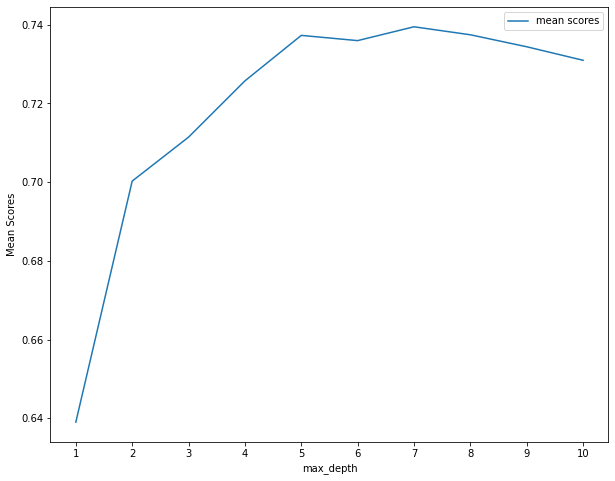

The optimal value for max_depth is:  7


In [31]:
# importing libraries
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# plotting the 5-fold cross validation scores for the Decision Tree model
max_depth_settings = range(1, 11)
mean_scores = []
 
# looping through the max_depth values on scaled data
for max_depth in max_depth_settings:
    # instantiating the Decision Tree model
    tree = DecisionTreeClassifier(max_depth=max_depth)
    
    # fitting the model to 5 folds of the train set
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    
    # appending the mean score to the list
    mean_scores.append(scores.mean())
     
# plotting the mean scores
plt.figure(figsize=(10, 8))
plt.plot(max_depth_settings, mean_scores, label='mean scores')
plt.ylabel('Mean Scores')
plt.xlabel('max_depth')
plt.xticks(max_depth_settings)
plt.legend()
plt.show()

# printing the optimal value for max_depth
cv_optimal_depth = max_depth_settings[mean_scores.index(max(mean_scores))]
print('The optimal value for max_depth is: ', cv_optimal_depth)

Next, we will fit our optimal value for the maximum depth to our Decision Tree model and see how it performs on our test set.

In [32]:
# instantiating the Decision Tree model with the optimal value for max_depth
tree = DecisionTreeClassifier(max_depth=cv_optimal_depth)
 
# fitting the model to the train set
tree.fit(X_train, y_train)
 
# predicting the target variable for the scaled test set
y_pred_tree_2 = tree.predict(X_test)
 
# training and test score
print('Training score: ', tree.score(X_train, y_train))
print('Test score: ', tree.score(X_test, y_test))

Training score:  0.7757462103453665
Test score:  0.7550972580267167


Fantastic! Our accuracy score has improved from 0.74 to 0.75. This means that our new feature has improved our accuracy score.

Next, lets look at the confusion matrix for our optimized Decision Tree model and see how our new feature has improved our precision and recall scores.

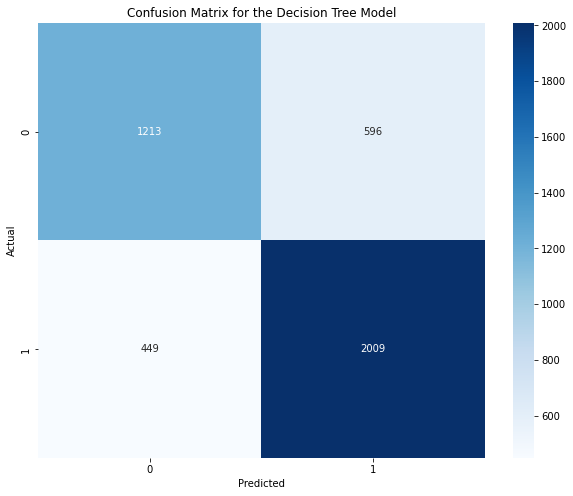

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1809
           1       0.77      0.82      0.79      2458

    accuracy                           0.76      4267
   macro avg       0.75      0.74      0.75      4267
weighted avg       0.75      0.76      0.75      4267



In [33]:
# importing the classification report
from sklearn.metrics import classification_report
# importing the confusion matrix
from sklearn.metrics import confusion_matrix

# confusion matrix for the optimized Decision Tree model
cf_matrix = confusion_matrix(y_test, y_pred_tree_2)
 
# plotting the confusion matrix for the optimized Decision Tree model
plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for the Decision Tree Model')
plt.show()

# classification report for the optimized Decision Tree model
print(classification_report(y_test, y_pred_tree_2))

Let's use this table as a reference to interpret our confusion matrix.

|     |  Predicted Class 0  |   Predicted Class 1  | 
| --------- |:---:|:---:|
|True Class 0|**TN** | **FP** | 
|True Class 1|**FN** |**TP** | 

This time, we are seeing an overall improvement in our precision and recall scores. This means that our new feature has improved our model. But unfortunately, there is still an imbalance in our data, which means that our model is more likely to predict a positive review than a negative review. 

---

## **Conclusion**

In this project, we learned how to build a machine learning model that can predict the sentiment of a hotel review. This included creating a baseline model, optimizing our models, and creating a new feature. We also learned how to interpret the results of our models. This included looking at the confusion matrix, accuracy score, precision score, and recall score. In the end, we were able to build a model that can predict the sentiment of a hotel review with an accuracy score of 0.76. This means that our model is correctly classifying 76% of the reviews in our test set.